## Gradient descent method

$x \in \mathbb{R}^n$에 대한 unconstrained optimization problem이 있습니다.
$$ minimize\,\,f(x) = -\sum_{i=1}^m \log(1 - a_i^T x) - \sum_{i=1}^n \log(1 - x_i^2) $$

Q1. $\mathbf{dom} f$를 구하세요. function $f$는 closed인가요? 그 이유를 설명해 주세요.

Q2. problem size $m = 200, n = 100,$ parameter $\alpha = 0.01, \beta = 0.5$에 대해 backtracking 방법으로 step size를 계산하고, gradient descent를 구현하세요. 이때 초기값 $x^{(0)} = 0$으로 설정하고, $\lVert \nabla f(x) \rVert_2 \leq 10^{-3}$을 stopping criterion으로 설정하세요. $f(x^{(k)}) - p^*$와 step size의 plot을 그려 확인해 보세요.

In [1]:
# Convex 패키지로 optimal value p* 구하기. 
using Random
using Convex, SCS
Random.seed!(20231)

m = 200;
n = 100;
A = randn(m, n)

x = Variable(n)
obj = -sum(log(1 - A*x)) - sum(log(1 + x)) - sum(log(1 - x))

problem = minimize(obj)
solve!(problem, SCS.Optimizer; silent_solver=true)
pstar = evaluate(obj)

-159.38581056740145

In [2]:
using LinearAlgebra

# Backtraking line search parameters
α = 0.01
β = 0.5

maxiter = 1000 # 혹시나 이만큼 반복해도 수렴하지 않으면 잘못 작성한 것입니다.
η = 1e-3 # stopping criterion

# problem size
m = 200 
n = 100

# gradient method. 이쪽 빈칸은 위쪽 블럭과 달리 "." 사용에 주의해서 작성해야 합니다.
vals = []
steps = []
x = zeros(n, 1)
for iter = 1:maxiter
    val = -sum(log.(1 .- A*x)) - sum(log.(1 .+ x)) - sum(log.(1 .- x)) #현재 x값에서의 objective value
    push!(vals, val) #vals.append(val)

    grad = # chain rule을 활용해 gradient를 도출하세요.
    v =  # gradient method에서 사용하는 direction을 쓰세요.
    fprime = # backtracking line search에서 사용하는 f의 first order approximation을 쓰세요.
    println(norm(grad)) #진행 과정을 보여주기 위해 norm(f)를 쭉 프린트해 줍니다.
        
    # stopping criterion
    if norm(grad) < η 
        break
    end
    
    t = 1
    while # x + t*Delta x)가 function domain에 포함되지 않는 조건을 작성하세요. (domain에 포함될 때까지 t를 줄인다는 동작입니다.)
    t = β*t
    end
    while # f(x + t*Delta x) > f(x) + alpha * t * fprime 인 조건을 작성하세요. (반대가 성립할 때까지 t를 줄인다는 동작입니다.)
    t = β*t
    end
    x = x+t*v #update x
    push!(steps, t)
end


154.339783144061
153.32607064220477
88.7138064047687
62.69804607012168
253.25172342617137
64.92712045203285
74.84038896750091
62.40767528417392
45.736544939507574
117.48359756985076
52.0575127267429
126.70274316267229
51.82883339182953
35.39061980096621
41.68822766183252
106.20926793031191
43.251713350885716
30.448332320553952
63.436873569332484
45.535849870829814
35.95003833019518
36.12703682180797
33.15660421392838
27.300988532626135
54.9427447338651
59.27690121806288
26.05470451106924
20.21345429482151
57.38487291764006
50.51019727444705
41.10820784782396
27.934984255852292
25.23237556258087
23.18267687516177
22.886308965345595
23.31030179917185
23.34815338368959
23.607441319558188
23.701174678203625
24.038046554385996
24.117861398239334
24.32246835228327
24.378283192218042
24.53307868544233
24.567325381693685
24.66337137025174
24.68404808795017
24.75589116026256
10.994302010066678
33.76390042046987
15.122049085018917
15.818922338535906
16.746066704651074
18.82156002952093
19.762637

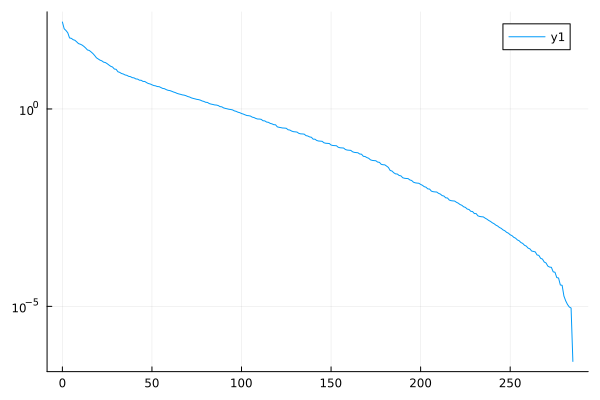

In [3]:
using Plots
gap = vals .- pstar
y = gap[gap .> 0]
x = [0:length(y)-1]
plot(x, y, yaxis =:log) 

#=
gap은 log scale plot에서 linear하게 감소합니다. 다만 앞에서 Convex 패키지로 구한 값이 아주 정확한 값은 아니므로 gap이 음수인 부분이 생기며,
마지막에 약간 비정상적인 패턴이 보입니다.
=#

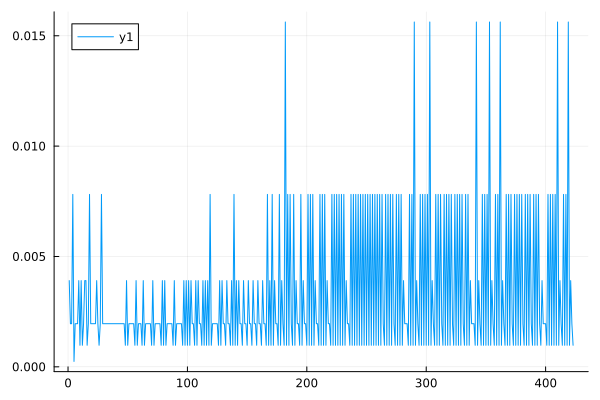

In [4]:
plot([1:length(steps)], steps)

아래는 참고용으로 써 놓은 Newton method의 코드입니다.

In [5]:
# Newton method 
ϵ = 1e-8

vals2 = [] 
steps2 = []
x = zeros(n,1)
for iter = 1:maxiter
    val = -sum(log.(1 .- A*x)) - sum(log.(1 .+ x)) - sum(log.(1 .- x))
    push!(vals2, val)
    grad = 
    hess = A'*Diagonal(dropdims(d.^2, dims=2))*A + Diagonal(dropdims((1 ./ (1 .+ x).^2) + (1 ./ (1 .- x).^2), dims=2))
    v = -hess\grad
    fprime = 
    if abs(fprime[1]) < ϵ 
        break 
    end
    t = 1
    while ((maximum(A*(x+t*v)) >= 1) || (maximum(abs.(x+t*v)) >= 1))
    t = β*t
    end
    while ( -sum(log.(1 .- A*(x+t*v))) - sum(log.(1 .- (x+t*v).^2)) > val + α*t*fprime[1] )
    t = β*t
    end
    x = x+t*v
    push!(steps2, t)
end

In [6]:
vals2 .- pstar #수렴이 훨씬 빠른 것을 확인해 볼 수 있습니다. 역시 Convex 패키지로 구한 값이 부정확하므로 gap이 음수인 부분이 생깁니다.

8-element Vector{Float64}:
 159.38581056740145
  84.37460140584177
  20.3938616356466
   5.692929721036336
   0.2293956635211032
   0.007809398338821438
  -7.533666382641968e-5
  -0.00011108808226367728

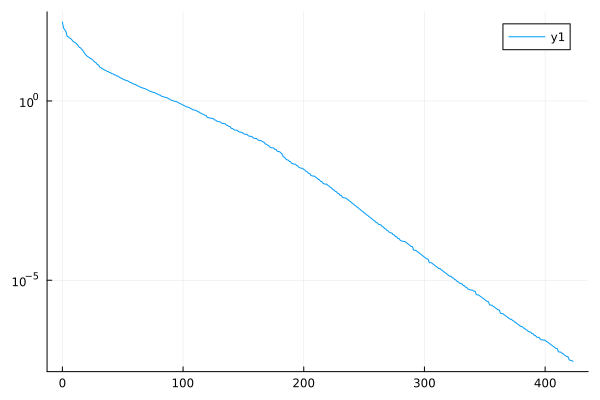

In [7]:
# newton method로 구한 값이 패키지보다 정확한 값이므로, 그 값을 optimal value로 설정해 아까의 그래프를 다시 그리면 정상적인 패턴이 나옵니다.
optval = vals2[end]
gap = vals .- optval
y = gap
x = [0:length(y)-1]
plot(x, y, yaxis =:log) 